<b> Predict house prices </b>
Below is a table containing house prices. The price dependents on area (square feet), bedrooms, and the age of the home (in years). Given these prices we have to build a model to predict prices of new homes base don area, bedrooms and age.

<table>
    <tr>
        <th>Area</th>
        <th>Bedrooms</th>
        <th>Age</th>
        <th>Price</th>
    </tr>
    <tr>
        <td>2600</td>
        <td>3</td>
        <td>20</td>
        <td>550000</td>
    </tr>
    <tr>
        <td>3000</td>
        <td>4</td>
        <td>15</td>
        <td>565000</td>
    </tr>
    <tr>
        <td>3200</td>
        <td></td>
        <td>18</td>
        <td>610000</td>
    </tr>
    <tr>
        <td>3600</td>
        <td>3</td>
        <td>30</td>
        <td>595000</td>
    </tr>
    <tr>
        <td>4000</td>
        <td>5</td>
        <td>8</td>
        <td>760000</td>
    </tr>
    <tr>
        <td>4100</td>
        <td>6</td>
        <td>8</td>
        <td>810000</td>
    </tr>
</table>

Given these home prices find out the price of a home that is:
- 3000 sqft, 3 bed, 40 years old
- 2500 sqft, 4 bed, 5 year old

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
df = pd.read_excel('House_Prices.xlsx')
df

,Area,Bedrooms,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [3]:
df.Bedrooms.median()

4.0

In [4]:
df.Bedrooms = df.Bedrooms.fillna(df.Bedrooms.median())
df


,Area,Bedrooms,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


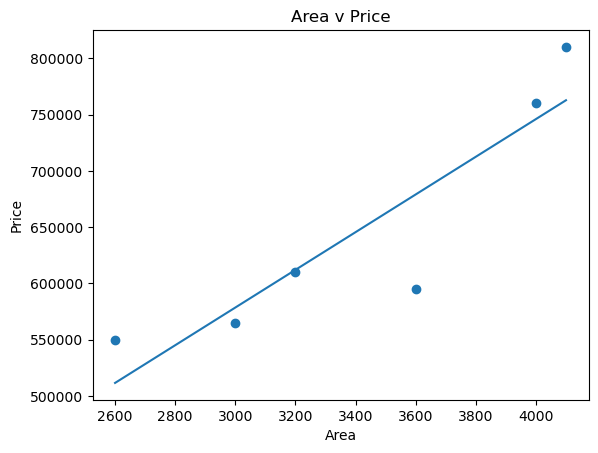

In [5]:
from matplotlib import pyplot as plt
plt.title("Area v Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(df.Area, df.Price)
plt.plot(np.unique(df.Area), np.poly1d(np.polyfit(df.Area, df.Price, 1))(np.unique(df.Area)))

In [6]:
from scipy.stats import pearsonr
corr = pearsonr(df.Area, df.Price)
print(corr)

PearsonRResult(statistic=0.9014764293346451, pvalue=0.01408216203765192)


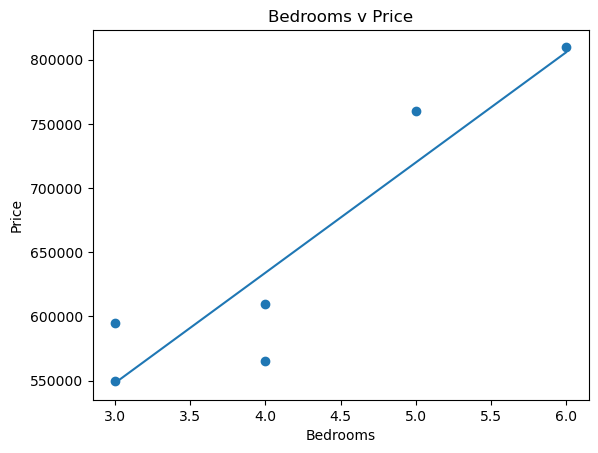

In [7]:
plt.title("Bedrooms v Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.scatter(df.Bedrooms, df.Price)
plt.plot(np.unique(df.Bedrooms), np.poly1d(np.polyfit(df.Bedrooms, df.Price, 1))(np.unique(df.Bedrooms)))

In [8]:
corr = pearsonr(df.Bedrooms, df.Price)
print(corr)

PearsonRResult(statistic=0.9198033987813916, pvalue=0.009389350256781892)


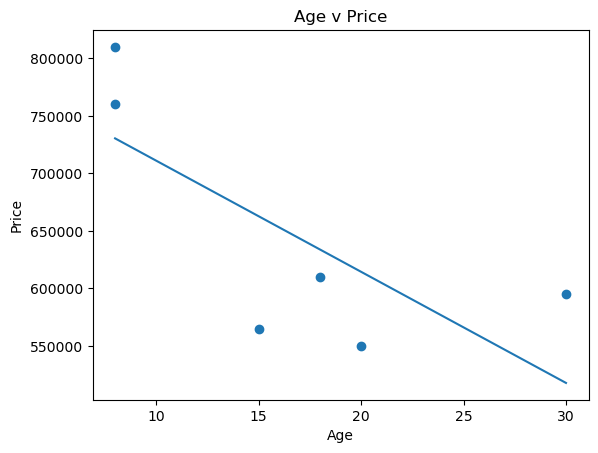

In [9]:
plt.title("Age v Price")
plt.xlabel("Age")
plt.ylabel("Price")
plt.scatter(df.Age, df.Price)
plt.plot(np.unique(df.Age), np.poly1d(np.polyfit(df.Age, df.Price, 1))(np.unique(df.Age)))

In [10]:
corr = pearsonr(df.Age, df.Price)
print(corr)

PearsonRResult(statistic=-0.7341665833688786, pvalue=0.09660822918598945)


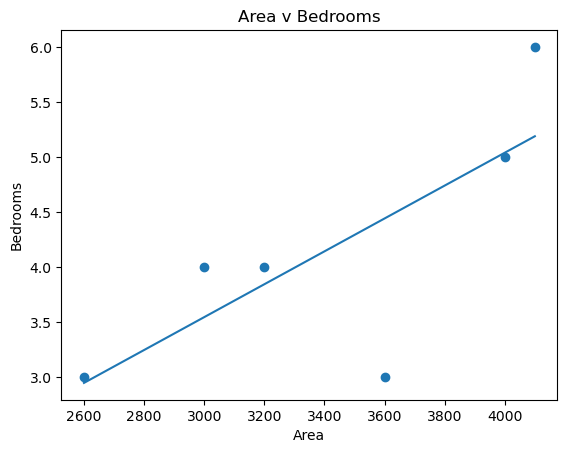

In [11]:
plt.title("Area v Bedrooms")
plt.xlabel("Area")
plt.ylabel("Bedrooms")
plt.scatter(df.Area, df.Bedrooms)
plt.plot(np.unique(df.Area), np.poly1d(np.polyfit(df.Area, df.Bedrooms, 1))(np.unique(df.Area)))

In [12]:
corr = pearsonr(df.Area, df.Bedrooms)
print(corr)

PearsonRResult(statistic=0.751710110621704, pvalue=0.08481853244322832)


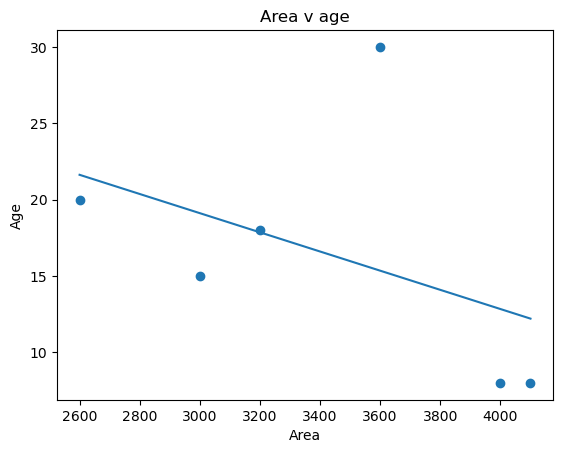

In [13]:
plt.title("Area v age")
plt.xlabel("Area")
plt.ylabel("Age")
plt.scatter(df.Area, df.Age)
plt.plot(np.unique(df.Area), np.poly1d(np.polyfit(df.Area, df.Age, 1))(np.unique(df.Area)))

In [14]:
corr = pearsonr(df.Area, df.Age)
print(corr)

PearsonRResult(statistic=-0.44529991730915874, pvalue=0.3761998332793568)


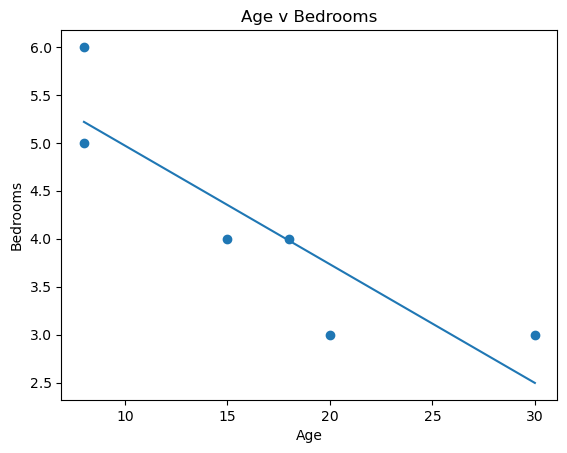

In [15]:
plt.title("Age v Bedrooms")
plt.xlabel("Age")
plt.ylabel("Bedrooms")
plt.scatter(df.Age, df.Bedrooms)
plt.plot(np.unique(df.Age), np.poly1d(np.polyfit(df.Age, df.Bedrooms, 1))(np.unique(df.Age)))

In [16]:
corr = pearsonr(df.Age, df.Bedrooms)
print(corr)

PearsonRResult(statistic=-0.8772214774517983, pvalue=0.021686431952520988)


In [17]:
import statsmodels.api as sm


In [18]:
data = list(zip(df.Area, df.Age))

In [19]:
data = sm.add_constant(data)
model = sm.OLS(df.Price, data)
result = model.fit()
print(result.summary())
# Next line gives the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     28.96
Date:                Fri, 21 Feb 2025   Prob (F-statistic):             0.0109
Time:                        13:09:01   Log-Likelihood:                -68.535
No. Observations:                   6   AIC:                             143.1
Df Residuals:                       3   BIC:                             142.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.84e+05   1.09e+05      2.607      0.0

C:\Users\johnl\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from word2number import w2n

In [21]:
!pip install word2number

In [22]:
from word2number import w2n

In [23]:
df = pd.read_excel("Salaries.xlsx")

In [24]:
df


,Experience,Test Score (out of 10),InterviewScore(out of 10),Salary ($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,Five,6.0,7,60000
3,Two,10.0,10,65000
4,Seven,9.0,6,70000
5,Three,7.0,10,62000
6,Ten,NaN,7,72000
7,Eleven,7.0,8,80000


In [25]:
df.Experience = df.Experience.fillna("Zero")

In [26]:
df

,Experience,Test Score (out of 10),InterviewScore(out of 10),Salary ($)
0,Zero,8.0,9,50000
1,Zero,8.0,6,45000
2,Five,6.0,7,60000
3,Two,10.0,10,65000
4,Seven,9.0,6,70000
5,Three,7.0,10,62000
6,Ten,NaN,7,72000
7,Eleven,7.0,8,80000


In [27]:
df.Experience = df.Experience.apply(w2n.word_to_num)

In [28]:
df

,Experience,Test Score (out of 10),InterviewScore(out of 10),Salary ($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [29]:
import math
test_score_average = math.floor(df['Test Score (out of 10)'].mean())


In [30]:
test_score_average

7

In [33]:
df["Test Score (out of 10)"] = df["Test Score (out of 10)"].fillna(test_score_average)

In [34]:
df

,Experience,Test Score (out of 10),InterviewScore(out of 10),Salary ($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


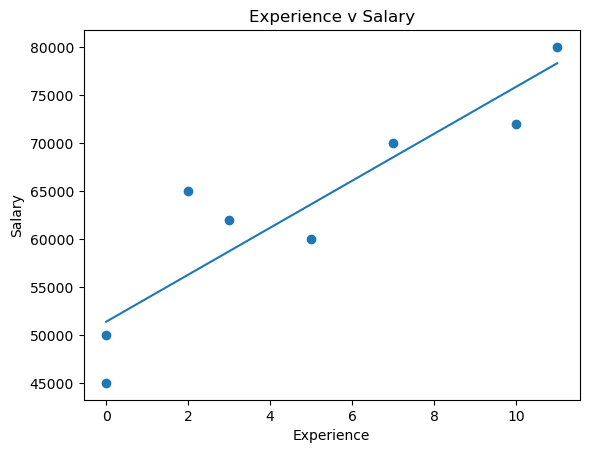

In [35]:
plt.title("Experience v Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.scatter(df.Experience, df["Salary ($)"])
plt.plot(np.unique(df.Experience), np.poly1d(np.polyfit(df.Experience, df["Salary ($)"], 1))(np.unique(df.Experience)))

In [37]:
corr = pearsonr(df.Experience, df["Salary ($)"])
print(corr)

PearsonRResult(statistic=0.908017060180008, pvalue=0.001813882412031107)


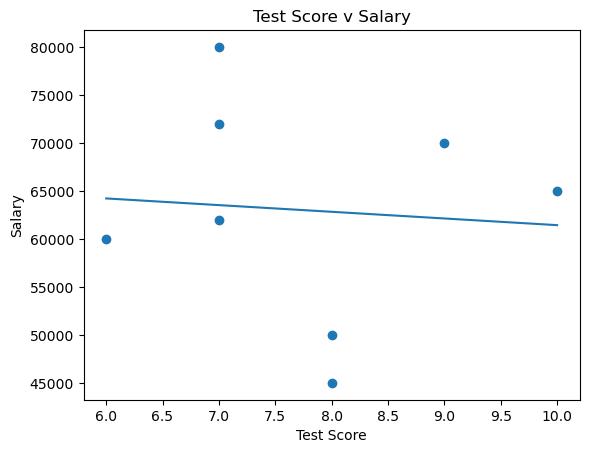

In [38]:
plt.title("Test Score v Salary")
plt.xlabel("Test Score")
plt.ylabel("Salary")
plt.scatter(df["Test Score (out of 10)"], df["Salary ($)"])
plt.plot(np.unique(df["Test Score (out of 10)"]), np.poly1d(np.polyfit(df["Test Score (out of 10)"], df["Salary ($)"], 1))(np.unique(df["Test Score (out of 10)"])))

In [39]:
corr = pearsonr(df["Test Score (out of 10)"], df["Salary ($)"])
print(corr)

PearsonRResult(statistic=-0.07752389300267237, pvalue=0.8552240443592602)


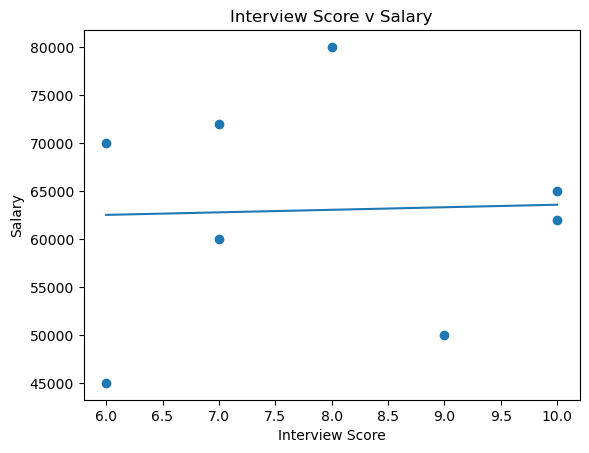

In [40]:
plt.title("Interview Score v Salary")
plt.xlabel("Interview Score")
plt.ylabel("Salary")
plt.scatter(df["InterviewScore(out of 10)"], df["Salary ($)"])
plt.plot(np.unique(df["InterviewScore(out of 10)"]), np.poly1d(np.polyfit(df["InterviewScore(out of 10)"], df["Salary ($)"], 1))(np.unique(df["InterviewScore(out of 10)"])))

In [41]:
corr = pearsonr(df["InterviewScore(out of 10)"], df["Salary ($)"])
print(corr)

PearsonRResult(statistic=0.037819957009852384, pvalue=0.9291551712697206)


In [42]:
data = sm.add_constant(df.Experience)
model = sm.OLS(df["Salary ($)"], data)
result = model.fit()
print(result.summary())
# Next line gives the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:             Salary ($)   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     28.19
Date:                Fri, 21 Feb 2025   Prob (F-statistic):            0.00181
Time:                        13:23:24   Log-Likelihood:                -78.659
No. Observations:                   8   AIC:                             161.3
Df Residuals:                       6   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.138e+04   2859.894     17.964      0.0

C:\Users\johnl\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


In [44]:
data = list(zip(df.Experience, df["Test Score (out of 10)"], df["InterviewScore(out of 10)"]))
data = sm.add_constant(data)
model = sm.OLS(df["Salary ($)"], data)
result = model.fit()
print(result.summary())
# Next line gives the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:             Salary ($)   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     56.67
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           0.000983
Time:                        13:30:22   Log-Likelihood:                -70.528
No. Observations:                   8   AIC:                             149.1
Df Residuals:                       4   BIC:                             149.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.499e+04   7386.210      2.030      0.1

C:\Users\johnl\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


In [45]:
import pandas as pd

In [46]:
df = pd.read_csv("weight-height.csv")

In [47]:
df


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [48]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

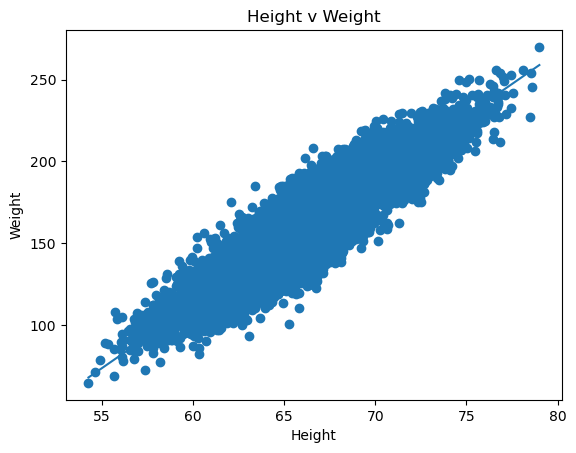

In [49]:
from matplotlib import pyplot as plt
plt.title("Height v Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.scatter(df.Height, df.Weight)
plt.plot(np.unique(df.Height), np.poly1d(np.polyfit(df.Height, df.Weight, 1))(np.unique(df.Height)))

Download heart disease dataset heart.csv from https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction 
1. Load data into a pandas dataframe
2. Remove outliers using Z score. Usual plan is to remove anything that has a Z-score > 3 or Z -3
3. Convert text columns to numbers using label encoding and one-hot encoding
4. Apply scaling
5. Build a classification model (logistic regression) and check accuracy
6. Use PCA to reduce the dimensions, retrain your model and see what impact it has on the model accuracy. Keep in mind that many times doing PCA reduces the accuracy but computation is much less and that is the trade off

In [2]:
import pandas as pd
# https://www.kaggle.com/fedesoriano/heart-failure-prediction
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df[df.Cholesterol>(df.Cholesterol.mean()+3*df.Cholesterol.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [11]:
df = df[df.Cholesterol>0]

In [12]:
df.shape

(746, 12)

In [13]:
dfc = df[df.Cholesterol<=(df.Cholesterol.mean()+3*df.Cholesterol.std())]

In [14]:
dfc.shape

(738, 12)

In [22]:
dfc[dfc.MaxHR>(dfc.MaxHR.mean()+3*dfc.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [23]:
dfc[dfc.FastingBS>(dfc.FastingBS.mean()+3*dfc.FastingBS.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [24]:
dfc[dfc.Oldpeak>(dfc.Oldpeak.mean()+3*dfc.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [25]:
dfcop = dfc[dfc.Oldpeak<=(dfc.Oldpeak.mean()+3*dfc.Oldpeak.std())]

In [26]:
dfcop.shape

(732, 12)

In [28]:
dfcop[dfcop.RestingBP>(dfcop.RestingBP.mean()+3*dfcop.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [29]:
dfcoprbp = dfcop[dfcop.RestingBP<=(dfcop.RestingBP.mean()+3*dfcop.RestingBP.std())]

In [31]:
dfcoprbp.shape

(727, 12)

In [32]:
dfcoprbp.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [33]:
dfcoprbp.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [34]:
dfcoprbp.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [35]:
dfcoprbp.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [36]:
dfn = dfcoprbp.copy()

In [39]:
dfn.ExerciseAngina.replace(
    {
        'N': 0,
        'Y' : 1
    },
    inplace=True)

dfn.ST_Slope.replace(
    {
        'Down': 1,
        'Flat' : 2,
        'Up' : 3
    },
    inplace=True)

dfn.RestingECG.replace(
    {
        'Normal': 1,
        'ST' : 2,
        'LVH' : 3
    },
    inplace=True)

dfn.ChestPainType.replace(
    {
        'ATA': 1,
        'NAP' : 2,
        'ASY' : 3,
        'TA':4
    },
    inplace=True)

dfn.Sex.replace(
    {
        'M': 1,
        'F' : 2,
    },
    inplace=True)

dfn.head()


C:\Users\johnl\AppData\Local\Temp\ipykernel_13500\395378353.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfn.ChestPainType.replace(
C:\Users\johnl\AppData\Local\Temp\ipykernel_13500\395378353.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfn.ChestPainType.replace(
C:\Users\johnl\AppDa

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,3,0
1,49,2,2,160,180,0,1,156,0,1.0,2,1
2,37,1,1,130,283,0,2,98,0,0.0,3,0
3,48,2,3,138,214,0,1,108,1,1.5,2,1
4,54,1,2,150,195,0,1,122,0,0.0,3,0


In [43]:
dfh = pd.get_dummies(dfn, columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], drop_first=True) 

In [44]:
dfh.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_2,ChestPainType_2,ChestPainType_3,ChestPainType_4,RestingECG_2,RestingECG_3,ExerciseAngina_1,ST_Slope_2,ST_Slope_3
0,40,140,289,0,172,0.0,0,False,False,False,False,False,False,False,False,True
1,49,160,180,0,156,1.0,1,True,True,False,False,False,False,False,True,False
2,37,130,283,0,98,0.0,0,False,False,False,False,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,False,False,False,True,True,False
4,54,150,195,0,122,0.0,0,False,True,False,False,False,False,False,False,True


In [45]:
X = dfh.drop("HeartDisease", axis="columns")
y = dfh.HeartDisease

In [46]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_2,ChestPainType_2,ChestPainType_3,ChestPainType_4,RestingECG_2,RestingECG_3,ExerciseAngina_1,ST_Slope_2,ST_Slope_3
0,40,140,289,0,172,0.0,False,False,False,False,False,False,False,False,True
1,49,160,180,0,156,1.0,True,True,False,False,False,False,False,True,False
2,37,130,283,0,98,0.0,False,False,False,False,True,False,False,False,True
3,48,138,214,0,108,1.5,True,False,True,False,False,False,True,True,False
4,54,150,195,0,122,0.0,False,True,False,False,False,False,False,False,True


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.35292242,  0.44881377,  0.90806655, ..., -0.78915642,
        -0.9503375 ,  1.04935984],
       [-0.40818695,  1.65795813, -1.17785157, ..., -0.78915642,
         1.05225775, -0.95296195],
       [-1.66783424, -0.15575842,  0.79324537, ..., -0.78915642,
        -0.9503375 ,  1.04935984],
       ...,
       [ 0.43157792, -0.15575842, -2.11555788, ...,  1.2671759 ,
         1.05225775, -0.95296195],
       [ 0.43157792, -0.15575842, -0.10618722, ..., -0.78915642,
         1.05225775, -0.95296195],
       [-1.56286364,  0.32789933, -1.27353589, ..., -0.78915642,
        -0.9503375 ,  1.04935984]])

- At this point we need to think about the problem a bit more
- PCA is not appropriate for categorical data. It is designed for continuous numerical data
- With categorical data, there is little or no spread between datapoints and the variance (or difference between categories) doesn't really mean anything
- There are other methods that you can use in this case

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer


In [3]:
cancer_dataset = load_breast_cancer()

In [4]:
cancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
cancer_dataset.DESCR


'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 

In [8]:
df = pd.DataFrame(cancer_dataset['data'], columns=cancer_dataset['feature_names'])

In [12]:
pd.options.display.max_columns = None
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [16]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(0.95)

In [32]:
data_pca = pca.fit_transform(scaled_data)
data_pca

array([[ 9.19283683,  1.94858307, -1.12316616, ..., -0.39840723,
        -0.15711836, -0.87740188],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.24098846,
        -0.71190482,  1.10699494],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.09737374,
         0.02406564,  0.4542754 ],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ...,  0.34188704,
         0.39391682,  0.52087738],
       [10.37479406,  1.67201011, -1.87702933, ..., -0.28023861,
        -0.54203454, -0.08929612],
       [-5.4752433 , -0.67063679,  1.49044308, ...,  1.04635352,
         0.37410111, -0.04772557]])

In [33]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

Text(0, 0.5, 'PC2')

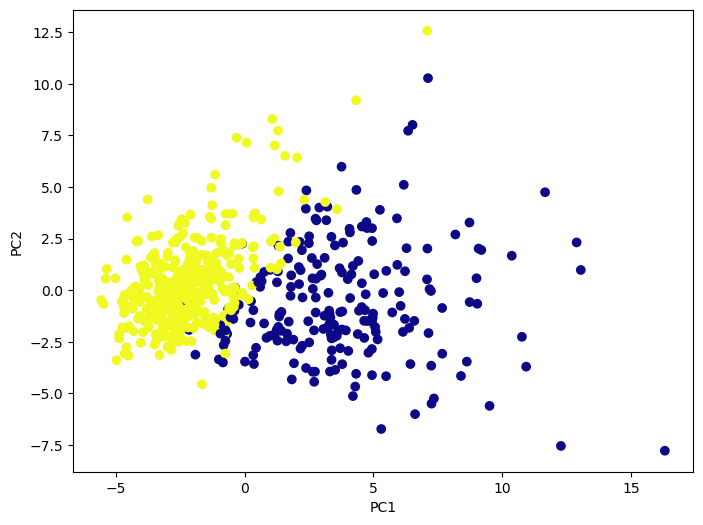

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0], data_pca[:,1], c = cancer_dataset['target'], cmap='plasma')
plt.xlabel("PC1")
plt.ylabel("PC2")